In [1]:
%load_ext autoreload
import sys
import os
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import scipy
import torch
from tensorboard.backend.event_processing import event_accumulator

sys.path.append('../')
sys.path.append('/workspace/MRI-inpainting-project')

from data_scripts.datasets import PathologicalMRIDataset, HealthyMRIDataset, TrainPatchesDataset
from data_scripts.visualization_utils import ImageSliceViewer3D

In [754]:
%autoreload 2
from dataset import NiftiImageGenerator, NiftiPairImageGenerator, TrainFCDDataset, HealthyFCDDataset, TrainFCDPatchesDataset
from torchvision.transforms import RandomCrop, Compose, ToPILImage, Resize, ToTensor, Lambda
import torch

In [63]:
results_dir = "../scripts/results/train_fcd_inpainting_data_l1_masked_25_000-50_000"
samples = sorted([file for file in os.listdir(results_dir) if '.nii.gz' in file], key=lambda file: int(file.split('-')[1].split('.')[0]))

In [64]:
samples

['sample-1.nii.gz',
 'sample-2.nii.gz',
 'sample-3.nii.gz',
 'sample-4.nii.gz',
 'sample-5.nii.gz']

In [65]:
def plot_slice(mri, axis, slice):
    if axis == 0:
        plt.imshow(mri[slice, :, :], cmap='gray')
    elif axis == 1:
        plt.imshow(mri[:, slice, :], cmap='gray')
    elif axis == 2:
        plt.imshow(mri[:, :, slice], cmap='gray')
    else:
        raise ValueError

    plt.show()

In [66]:
%autoreload 2
my_dataset = TrainFCDDataset('../../data/pathological_mri', input_size, depth_size, 
                             mask_transform=input_transform, target_transform=transform, inpainting=True)

sample_orig = my_dataset[22]

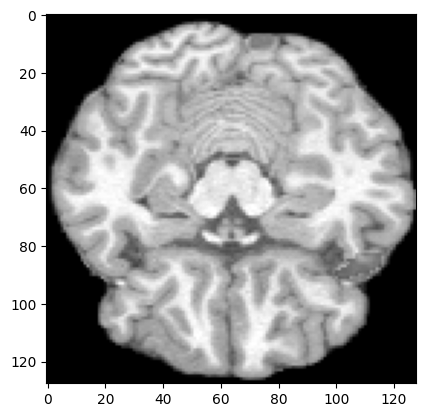

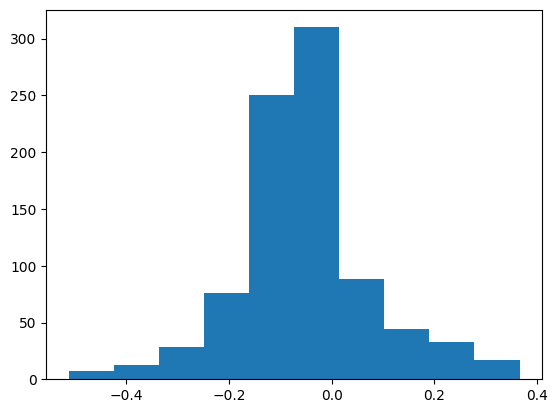

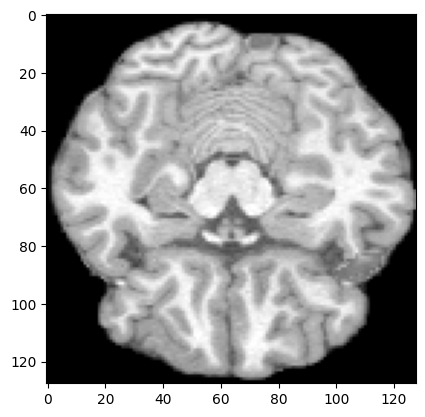

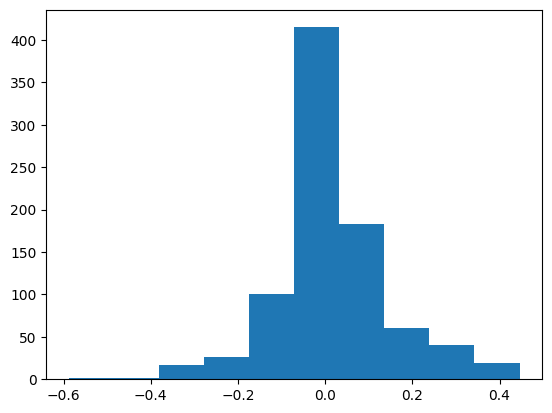

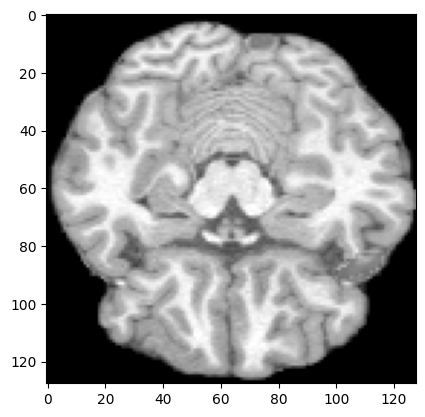

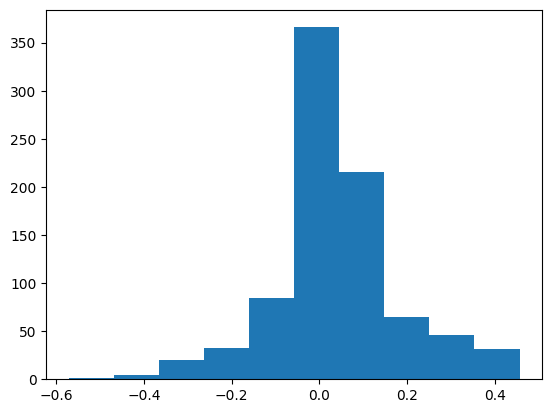

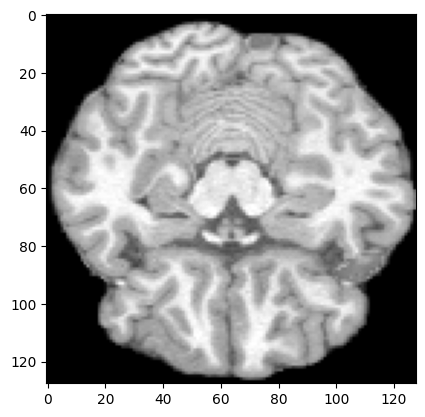

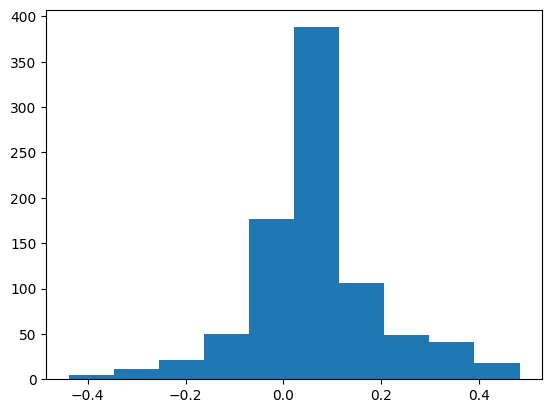

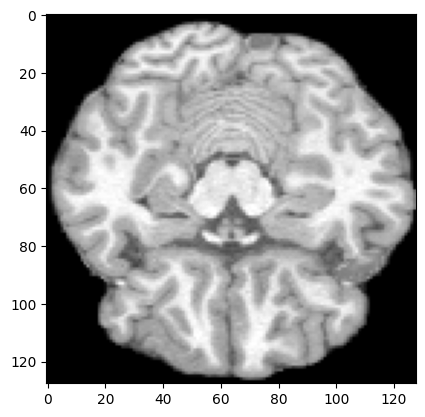

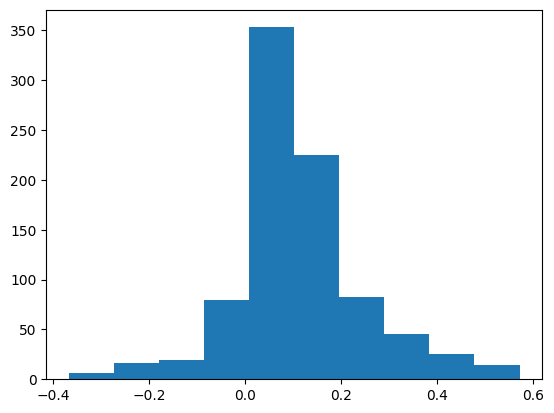

In [67]:
for sample_name in samples:
    sample_gen = nib.load(results_dir + f"/{sample_name}").get_fdata()
    recon = sample_orig['target'][0].numpy().copy()
    recon[sample_orig['input'][1].numpy() == 1] = torch.from_numpy(sample_gen).permute(2, 1, 0).numpy()[sample_orig['input'][1].numpy() == 1].flatten()
    plot_slice(recon, 0, 43)
    plt.hist(torch.from_numpy(sample_gen).permute(2, 1, 0).numpy()[sample_orig['input'][1].numpy() == 1])
    plt.show()

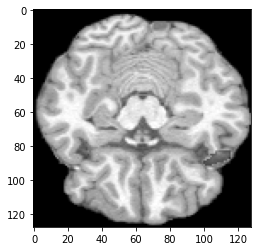

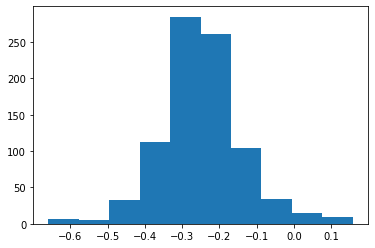

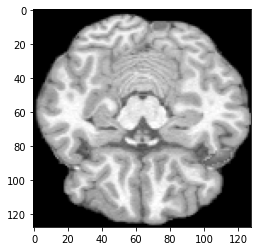

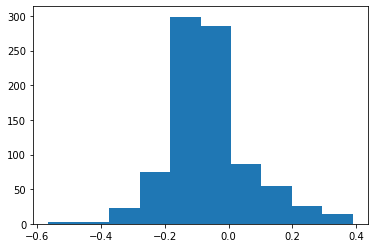

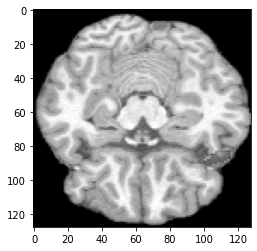

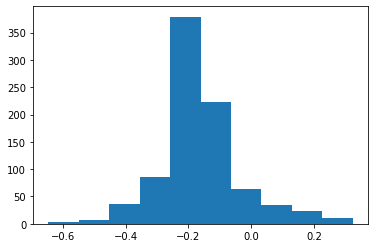

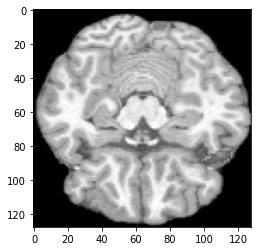

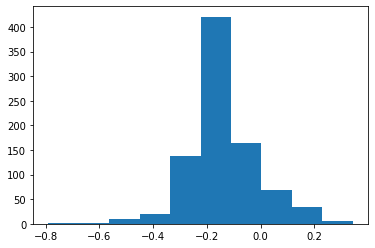

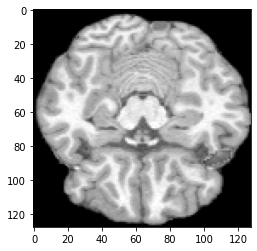

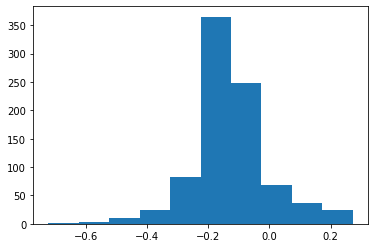

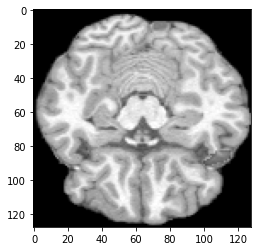

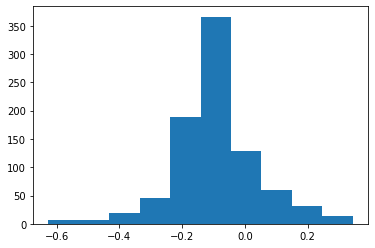

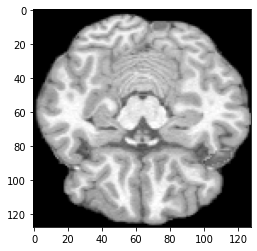

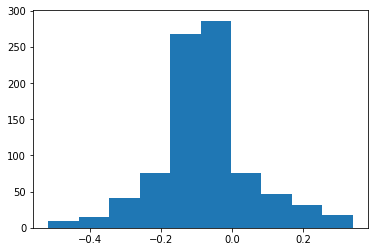

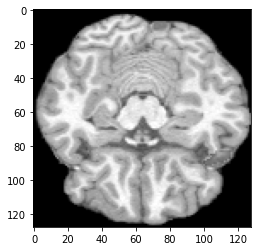

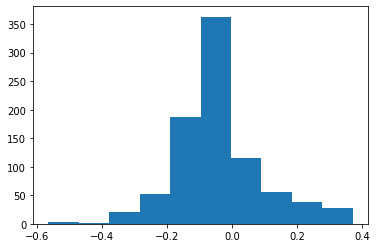

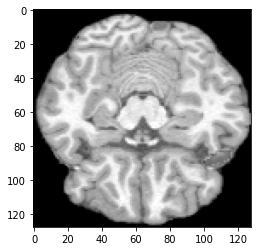

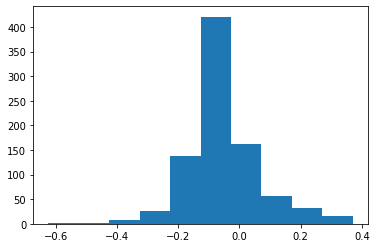

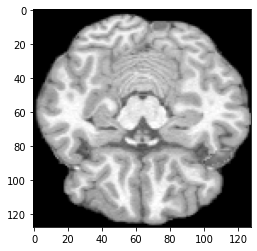

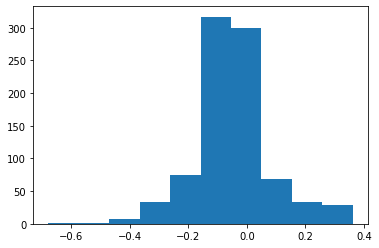

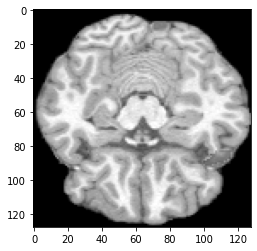

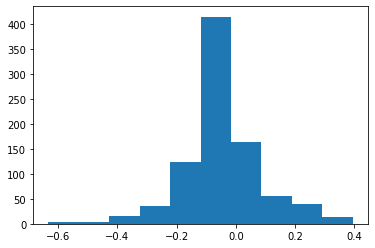

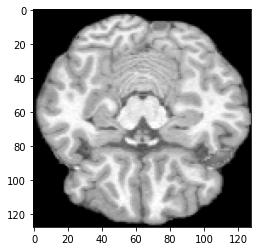

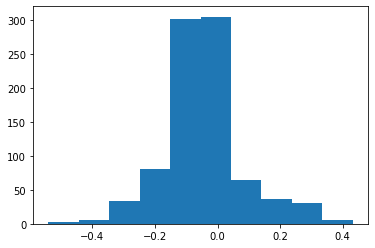

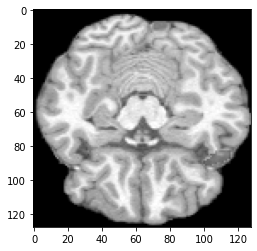

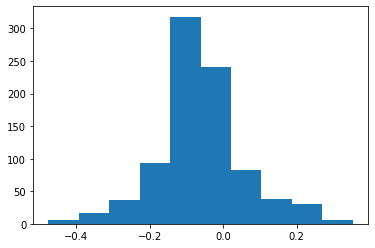

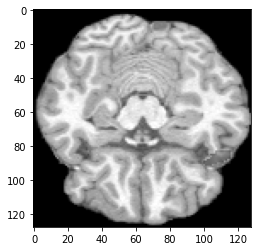

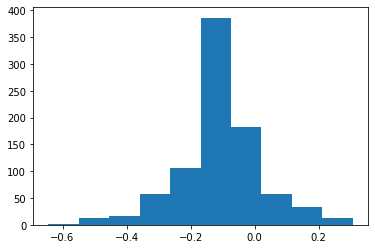

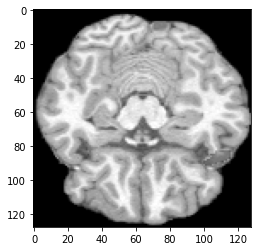

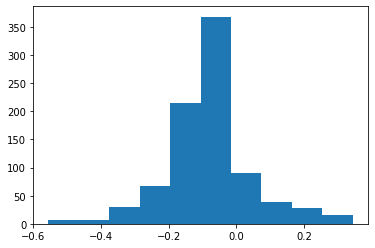

In [222]:
for sample_name in samples:
    sample_gen = nib.load(results_dir + f"/{sample_name}").get_fdata()
    recon = sample_orig['target'][0].numpy().copy()
    recon[sample_orig['input'][1].numpy() == 1] = torch.from_numpy(sample_gen).permute(2, 1, 0).numpy()[sample_orig['input'][1].numpy() == 1].flatten()
    plot_slice(recon, 0, 43)
    plt.hist(torch.from_numpy(sample_gen).permute(2, 1, 0).numpy()[sample_orig['input'][1].numpy() == 1])
    plt.show()

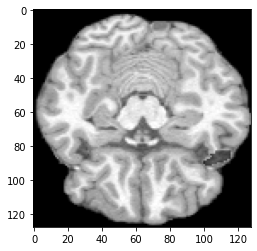

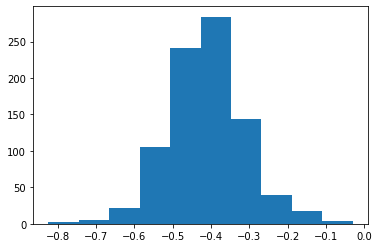

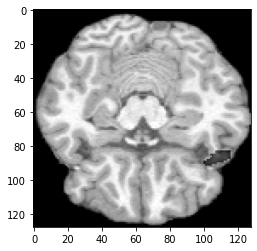

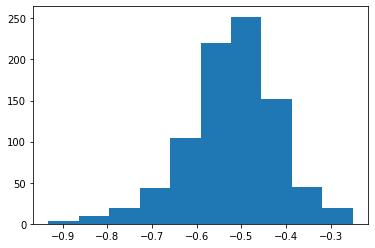

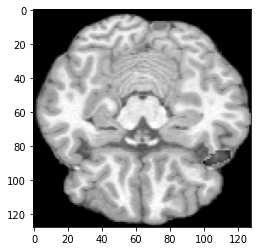

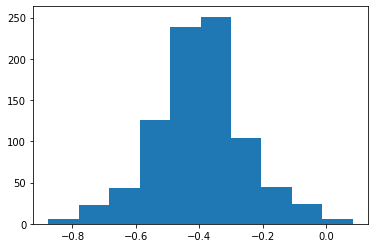

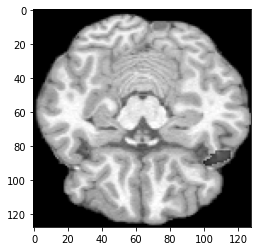

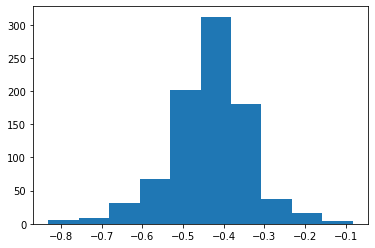

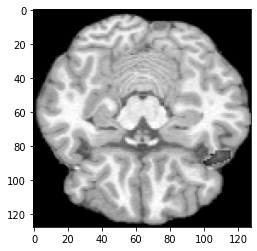

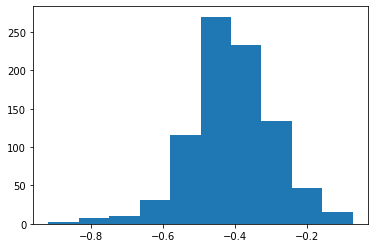

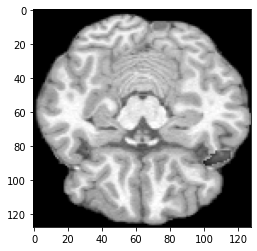

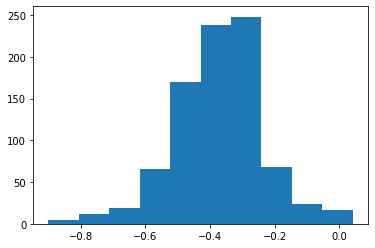

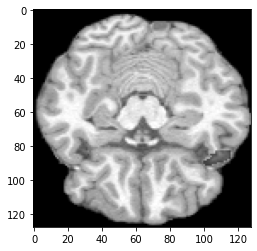

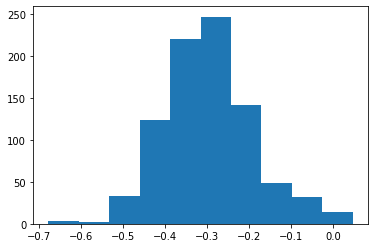

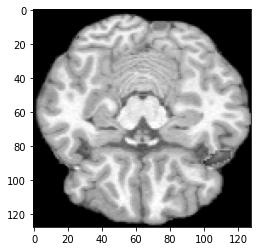

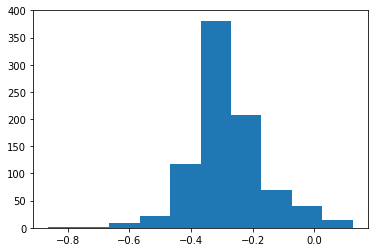

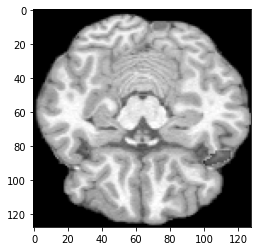

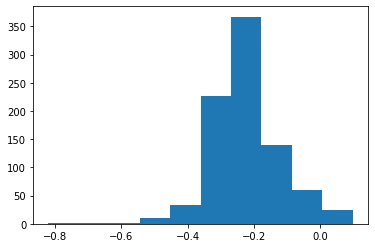

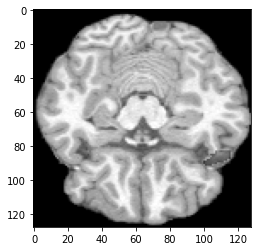

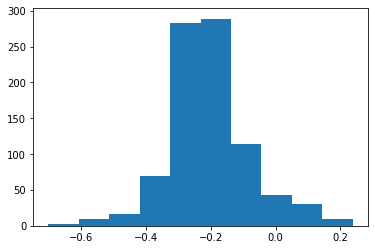

In [180]:
for sample_name in samples:
    sample_gen = nib.load(results_dir + f"/{sample_name}").get_fdata()
    recon = sample_orig['target'][0].numpy().copy()
    recon[sample_orig['input'][1].numpy() == 1] = torch.from_numpy(sample_gen).permute(2, 1, 0).numpy()[sample_orig['input'][1].numpy() == 1].flatten()
    plot_slice(recon, 0, 43)
    plt.hist(torch.from_numpy(sample_gen).permute(2, 1, 0).numpy()[sample_orig['input'][1].numpy() == 1])
    plt.show()

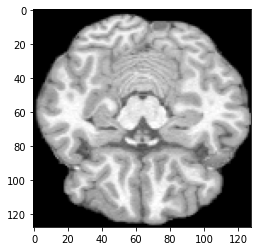

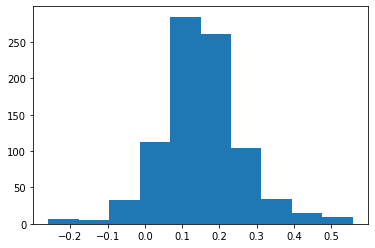

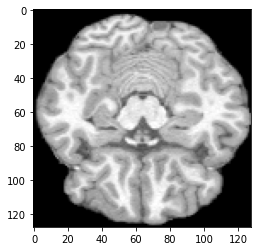

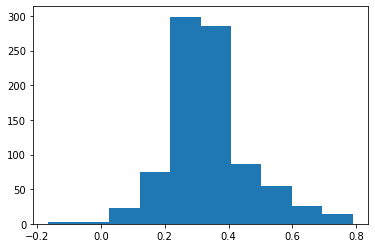

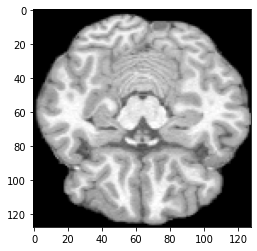

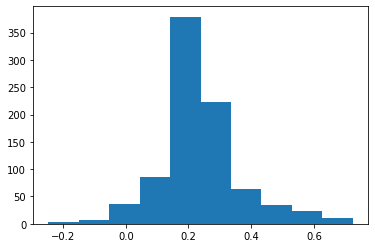

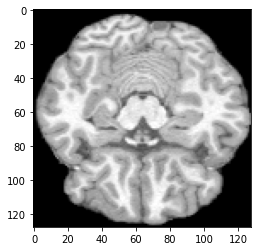

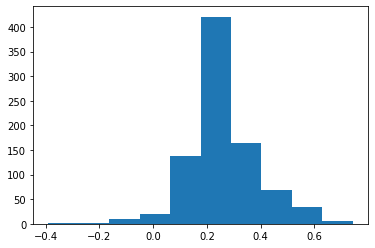

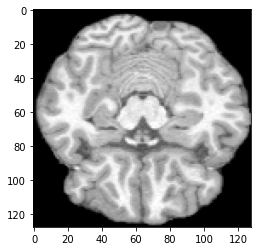

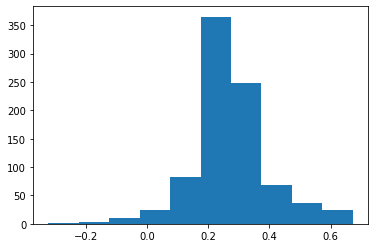

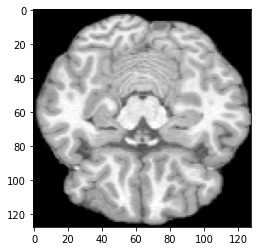

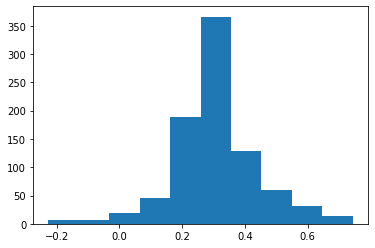

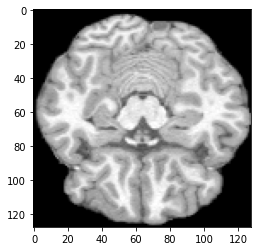

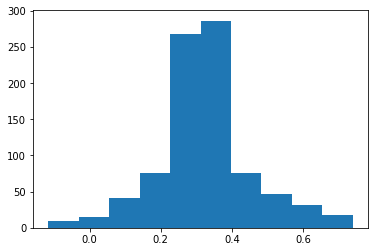

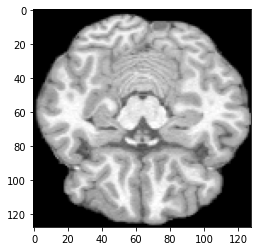

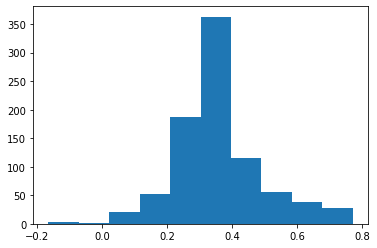

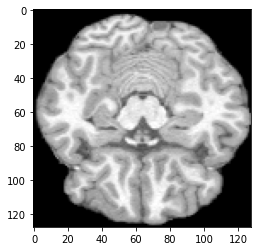

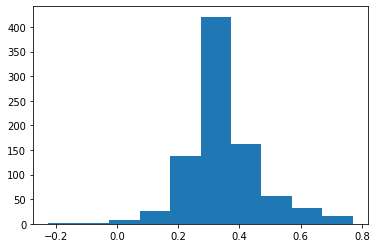

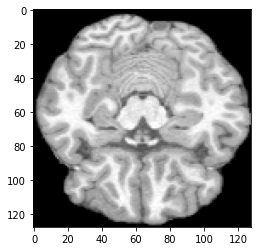

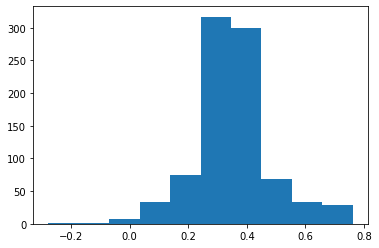

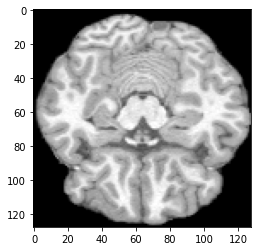

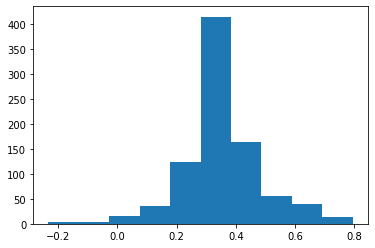

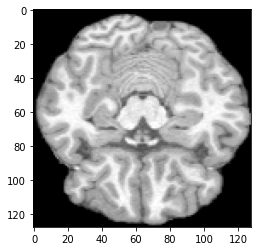

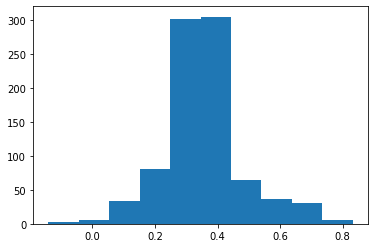

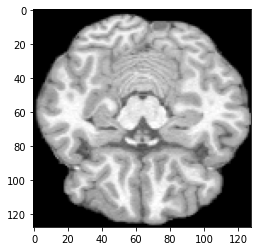

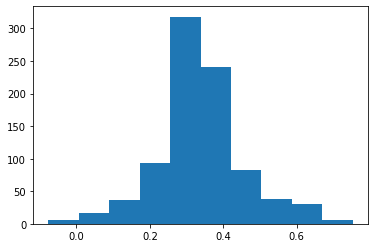

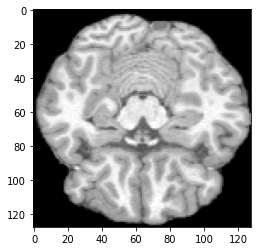

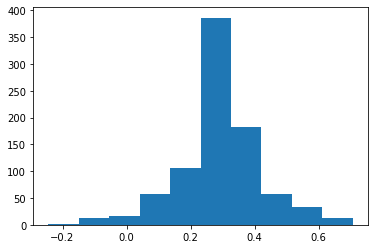

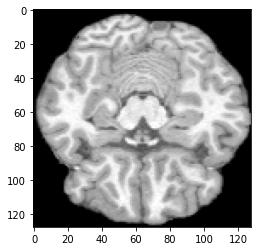

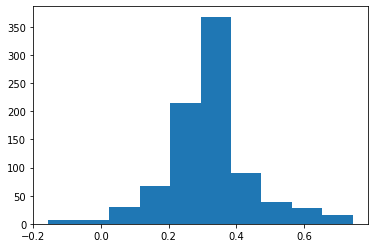

In [201]:
for sample_name in samples:
    sample_gen = nib.load(results_dir + f"/{sample_name}").get_fdata() + 0.4
    recon = sample_orig['target'][0].numpy().copy()
    recon[sample_orig['input'][1].numpy() == 1] = torch.from_numpy(sample_gen).permute(2, 1, 0).numpy()[sample_orig['input'][1].numpy() == 1].flatten()
    plot_slice(recon, 0, 43)
    plt.hist(torch.from_numpy(sample_gen).permute(2, 1, 0).numpy()[sample_orig['input'][1].numpy() == 1])
    plt.show()

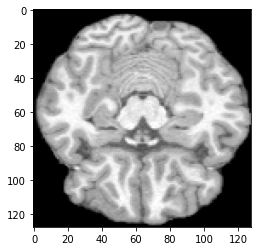

In [202]:
plot_slice(sample_orig['target'][0].numpy().copy(), 0, 43)

(array([1.18134e+06, 7.28590e+04, 7.89200e+04, 1.09325e+05, 1.86574e+05,
        1.83981e+05, 1.57758e+05, 1.21462e+05, 4.91700e+03, 1.60000e+01]),
 array([-1.        , -0.85783762, -0.71567523, -0.57351285, -0.43135047,
        -0.28918809, -0.1470257 , -0.00486332,  0.13729906,  0.27946144,
         0.42162383]),
 <BarContainer object of 10 artists>)

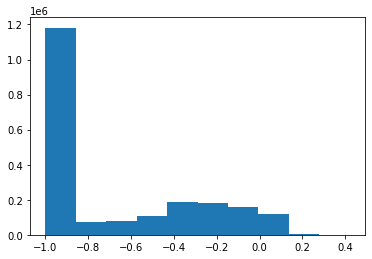

In [196]:
sample_gen_0 = nib.load(results_dir + f"/{samples[0]}").get_fdata()
plt.hist(sample_gen_0.flatten())

In [148]:
sample_model5_finetuned = nib.load("../scripts/results/train_fcd_data/sample-5.nii.gz").get_fdata()

(array([169001., 828708.,  56891.,  15690.,  12087.,  13378.,  17556.,
         38115., 232631., 713095.]),
 array([-0.79610109, -0.61649098, -0.43688087, -0.25727077, -0.07766066,
         0.10194945,  0.28155956,  0.46116967,  0.64077978,  0.82038989,
         1.        ]),
 <BarContainer object of 10 artists>)

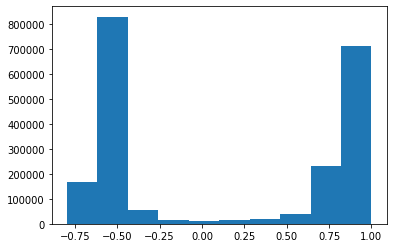

In [154]:
plt.hist(sample_model5_finetuned.flatten())

(array([1070109.,   14082.,   24971.,   34049.,   54202.,   95276.,
         223068.,  203304.,  151312.,  226779.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

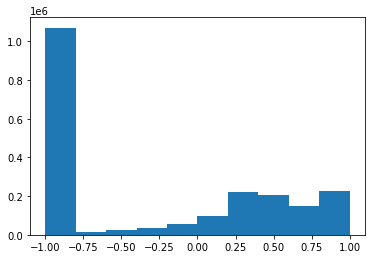

In [153]:
plt.hist(sample_orig['target'][0].numpy().flatten())

In [174]:
sample = my_dataset[29]
target = sample['target'][0].numpy()
mask = sample['input'][1].numpy()

In [176]:
ImageSliceViewer3D(target, mask > 0, cmap='gray', mask_intensity=0.2)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [199]:
sample_gen = nib.load(results_dir + f"/{samples[-1]}").get_fdata()

(array([  1.,   5.,  18.,  65., 382., 218.,  81.,  50.,  36.,  10.]),
 array([-0.13482565, -0.03285559,  0.06911447,  0.17108452,  0.2730546 ,
         0.37502465,  0.4769947 ,  0.57896477,  0.68093485,  0.78290486,
         0.88487494], dtype=float32),
 <BarContainer object of 10 artists>)

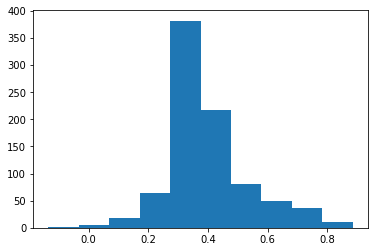

In [197]:
plt.hist(sample_orig['target'][0].numpy()[sample_orig['input'][1].numpy() == 1])

(array([  6.,   7.,  30.,  68., 214., 368.,  91.,  39.,  28.,  15.]),
 array([-0.55511338, -0.46514854, -0.37518371, -0.28521888, -0.19525405,
        -0.10528922, -0.01532439,  0.07464044,  0.16460527,  0.2545701 ,
         0.34453493]),
 <BarContainer object of 10 artists>)

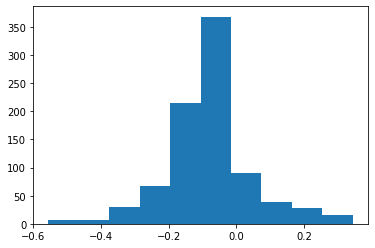

In [200]:
plt.hist(torch.from_numpy(sample_gen).permute(2, 1, 0).numpy()[sample_orig['input'][1].numpy() == 1])

In [124]:
recon = sample_orig['target'][0].numpy().copy()
recon[sample_orig['input'][1].numpy() == 1] = torch.from_numpy(sample_gen + 0.8).permute(2, 1, 0).numpy()[sample_orig['input'][1].numpy() == 1].flatten()

In [23]:
recon.shape

(128, 128, 128)

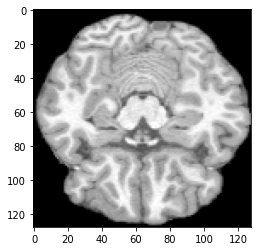

In [125]:
plt.imshow(((recon + 1) / 2)[43, :, :], cmap='gray')

In [128]:
ImageSliceViewer3D(recon, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [131]:
ImageSliceViewer3D(sample_orig['target'][0].numpy(), sample_orig['input'][1].numpy() == 1, cmap='gray', mask_intensity=0.)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [48]:
ImageSliceViewer3D(sample4, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [24]:
sample_orig = nib.load('../exports/image/1_sample_0.nii.gz').get_fdata()

In [25]:
ImageSliceViewer3D(sample_orig, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [15]:
ImageSliceViewer3D(sample3, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [26]:
ImageSliceViewer3D(sample4, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [27]:
ImageSliceViewer3D(sample10, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [27]:
sample_baseline1 = nib.load('../exports/image/1_sample_2.nii.gz').get_fdata()

In [28]:
ImageSliceViewer3D(sample_baseline1, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [24]:
np.unique(sample_baseline1)

array([0., 1., 2.])

In [37]:
with open('../scripts/results/train_defaultdata_10000epochs/output_TrainDefaultdata_v1.log') as file:
    content = file.read()

In [39]:
content = content[len('nohup: ignoring input\nAPEX: OFF\n4\n'):]

In [41]:
content = [elem.split(':') for elem in content.split('\n')]

In [46]:
from tensorboard.backend.event_processing import event_accumulator

In [47]:
ea = event_accumulator.EventAccumulator('../scripts/results/train_fcd_inpainting_data_l1_masked_patches_filtered_500_000/24-12-06T113336/events.out.tfevents.1733484816.c8045da5694c.45190.0')
ea.Reload()

loss = np.array([step.value for step in ea.Scalars('training_loss')])
len(loss)

10000

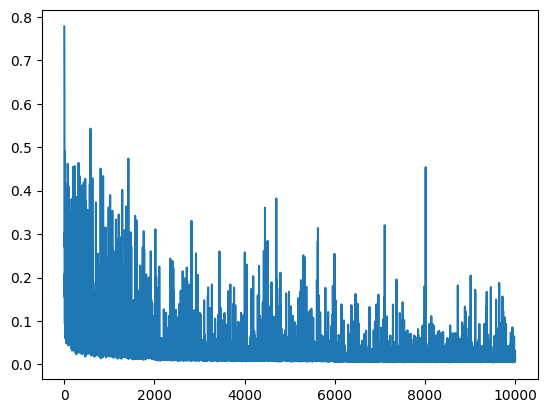

In [94]:
plt.plot(loss)

In [769]:
ea = event_accumulator.EventAccumulator('../scripts/results/train_fcd_inpainting_data_l1_masked_patches_v2_500_000_cont/24-11-28T230513/events.out.tfevents.1732835113.c8045da5694c.3370.0')
ea.Reload()

loss = np.array([step.value for step in ea.Scalars('training_loss')])
len(loss)

10000

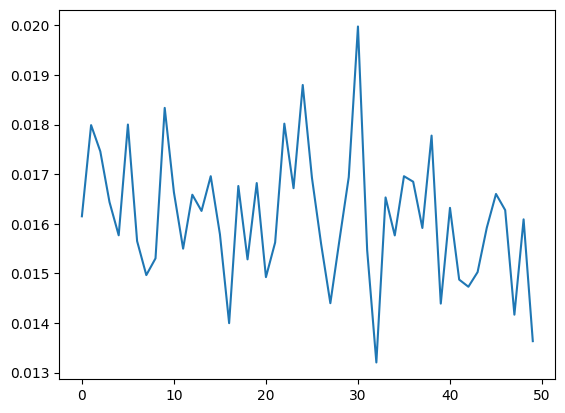

In [770]:
plt.plot(loss.reshape(-1, 200).mean(axis=1))

In [4]:
from dataset import NiftiImageGenerator, NiftiPairImageGenerator, TrainFCDDataset, TrainFCDPatchesDataset
from torchvision.transforms import RandomCrop, Compose, ToPILImage, Resize, ToTensor, Lambda
import torch

In [5]:
inputfolder  = '../dataset/whole_head/mask/'
targetfolder = '../dataset/whole_head/image/'

input_size = 128
depth_size = 128

# input tensor: (B, 1, H, W, D)  value range: [-1, 1]
transform = Compose([
    Lambda(lambda t: torch.tensor(t).float()),
    Lambda(lambda t: (t * 2) - 1),
    Lambda(lambda t: t.unsqueeze(0)),
    Lambda(lambda t: t.transpose(3, 1)),
])

input_transform = Compose([
    Lambda(lambda t: torch.tensor(t).float()),
    Lambda(lambda t: (t * 2) - 1),
    Lambda(lambda t: t.permute(3, 0, 1, 2)),
    Lambda(lambda t: t.transpose(3, 1)),
])

In [6]:
dataset = NiftiPairImageGenerator(
        inputfolder,
        targetfolder,
        input_size=input_size,
        depth_size=depth_size,
        transform=input_transform,
        target_transform=transform,
        full_channel_mask=True
    )

In [19]:
np.unique(dataset[0]['input'])

array([-1.,  1.], dtype=float32)

In [14]:
dataset[0]['target'].dtype

torch.float32

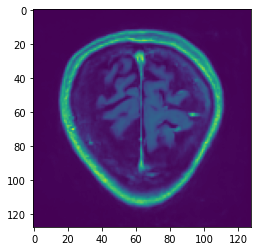

In [10]:
plt.imshow(dataset[0]['target'][0][95, :, :])

In [11]:
type(dataset[0]['target'])

torch.Tensor

In [81]:
mri = my_dataset[3]['mri']
x, y, z = np.where(mri != 0)
x, y, z = np.sort(x), np.sort(y), np.sort(z)

In [82]:
x.max() - x.min(), y.max() - y.min(), z.max() - z.min()

(148, 185, 157)

In [71]:
orig_mask = nib.load('/workspace/MRI-inpainting-project/med-ddpm-main/dataset/whole_head/mask/sample_0.nii.gz').get_fdata()

In [74]:
orig_mask.shape

(128, 128, 128)

In [73]:
np.unique(orig_mask)

array([0., 1., 2.])

In [204]:
%autoreload 2
my_dataset = TrainInpaintingFCDDataset('../../data/pathological_mri', input_size, depth_size, 
                             mask_transform=input_transform, target_transform=transform)

NameError: name 'TrainInpaintingFCDDataset' is not defined

In [ ]:
%%time
sample_orig = my_dataset[22]

In [54]:
sample_cond = my_dataset.sample_conditions(1).cpu()

ImageSliceViewer3D(sample_cond[0][0].numpy(), sample_cond[0][1].numpy() == 1, cmap='gray', mask_intensity=0.)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [60]:
ImageSliceViewer3D(sample_inpaint5.transpose(1, 0, 2), cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

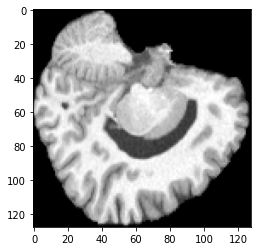

In [60]:
plt.imshow(sample['input'][0][:, :, 50], cmap='gray')

In [45]:
ImageSliceViewer3D(sample['input'][0].numpy(), sample['input'][1].numpy() == 1, cmap='gray', mask_intensity=0.)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [19]:
np.unique((sample['input'][1].numpy() < 0).astype(np.float32))

array([0., 1.], dtype=float32)

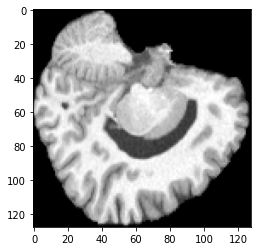

In [61]:
plt.imshow(sample['target'][0][:, :, 50], cmap='gray')

In [112]:
sample['input'].shape

torch.Size([2, 128, 128, 128])

In [74]:
sample['target'].dtype, sample['input'].dtype

(torch.float32, torch.float32)

In [75]:
np.unique(sample['input'][0])

array([-1.,  1.], dtype=float32)

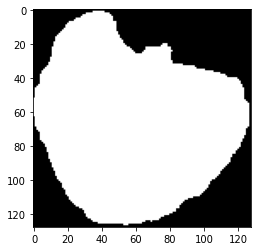

In [79]:
plt.imshow(sample['input'][0][:, :, 50], cmap='gray')

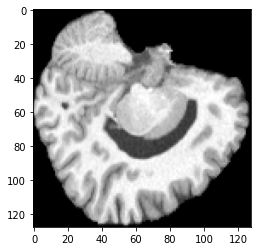

In [80]:
plt.imshow(sample['target'][0][:, :, 50], cmap='gray')

In [10]:
ImageSliceViewer3D((sample['input'][1]).numpy(), cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [32]:
sample['target'].shape

torch.Size([1, 128, 128, 128])

In [34]:
ImageSliceViewer3D(sample['target'][0].numpy(), cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

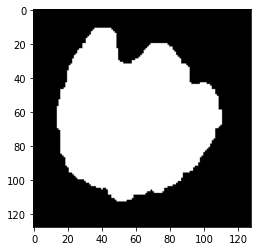

In [7]:
plt.imshow(sample['input'][0][:, :, 20].numpy(), cmap='gray')

In [23]:
my_base_dataset = PathologicalMRIDataset('../../data/pathological_mri')
base_sample_0 = my_base_dataset[0]['mri']
base_sample_1 = my_base_dataset[1]['mri']

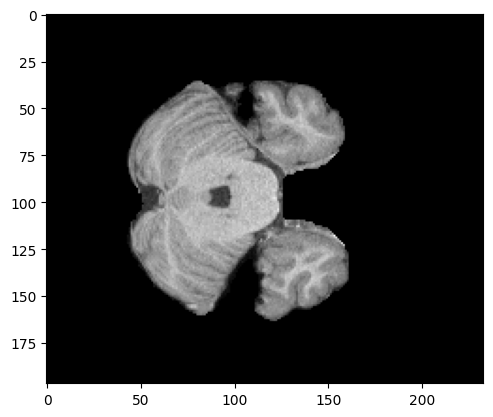

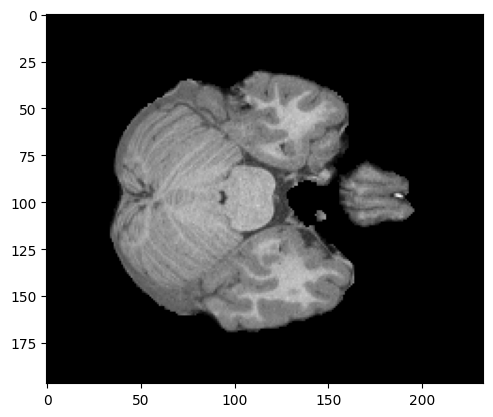

In [41]:
slice = 40
plt.imshow(base_sample_0[:, :, slice-2], cmap='gray')
plt.show()
plt.imshow(base_sample_1[:, :, slice+4], cmap='gray')
plt.show()

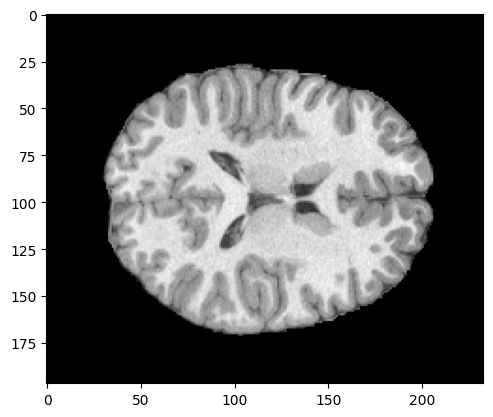

In [22]:
plt.imshow(my_base_dataset[1]['mri'][:, :, 90], cmap='gray')

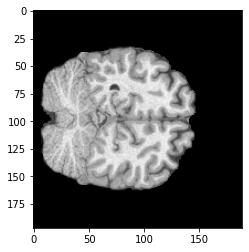

In [10]:
scaler = MinMaxScaler
plt.imshow(self.scaler.fit_transform(mri_resized.reshape(-1, mri_resized.shape[-1])).reshape(mri_resized.shape)base_sample[:, 70, :], cmap='gray')

In [16]:
base_sample_resized = scipy.ndimage.zoom(base_sample, (0.5, 0.3, 0.4), order=3)

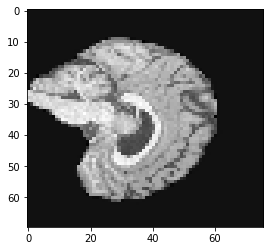

In [19]:
plt.imshow(base_sample_resized[50, :, :], cmap='gray')

In [6]:
ImageSliceViewer3D(sample['target'][0][:, :, :].numpy(), cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

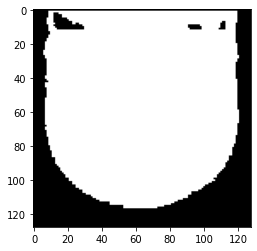

In [28]:
plt.imshow(dataset[0]['input'][0][:, 60, :], cmap='gray')

In [6]:
orig_mri = nib.load('/workspace/MRI-inpainting-project/med-ddpm-main/dataset/whole_head/image/sample_0.nii.gz').get_fdata()

In [12]:
orig_mri.mean()

-0.7483056187190016

(array([1.153697e+06, 4.149590e+05, 3.178550e+05, 7.719600e+04,
        6.024100e+04, 3.833500e+04, 2.434500e+04, 8.799000e+03,
        1.535000e+03, 1.900000e+02]),
 array([-1.00000000e+00, -8.00000012e-01, -6.00000024e-01, -4.00000036e-01,
        -2.00000048e-01, -5.96046448e-08,  1.99999928e-01,  3.99999917e-01,
         5.99999905e-01,  7.99999893e-01,  9.99999881e-01]),
 <BarContainer object of 10 artists>)

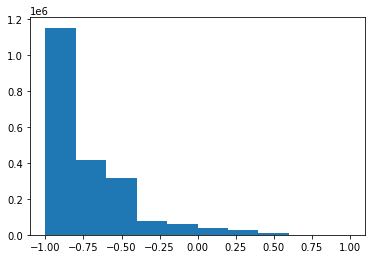

In [13]:
plt.hist(orig_mri.flatten())

In [88]:
healthy_dataset = HealthyFCDDataset(mri_path='/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_mri_t1',
                                    mask_path='/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/sphere_masks/masks',
                                    brain_mask_path='/workspace/MRI-inpainting-project/data/healthy_mri_C_00/brain_mask',
                                    input_size=128, depth_size=128, mri_transform=transform, mask_transform=input_transform, inpainting=True)

In [8]:
sample = healthy_dataset[0].cpu().numpy()

In [22]:
sample.shape

(1, 2, 128, 128, 128)

In [28]:
ImageSliceViewer3D(sample[0][0], sample[0][1] == 1, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [68]:
from diffusion_model.unet import create_model
from diffusion_model.trainer import GaussianDiffusion

APEX: OFF


In [69]:
inputfolder  = '../dataset/whole_head/mask/'
targetfolder = '../dataset/whole_head/image/'

input_size = 128
depth_size = 128

# input tensor: (B, 1, H, W, D)  value range: [-1, 1]
transform = Compose([
    Lambda(lambda t: torch.tensor(t).float()),
    Lambda(lambda t: (t * 2) - 1),
    Lambda(lambda t: t.unsqueeze(0)),
    Lambda(lambda t: t.transpose(3, 1)),
])

input_transform = Compose([
    Lambda(lambda t: torch.tensor(t).float()),
    Lambda(lambda t: (t * 2) - 1),
    Lambda(lambda t: t.permute(3, 0, 1, 2)),
    Lambda(lambda t: t.transpose(3, 1)),
])

In [70]:
ckpt_path = '../scripts/results/train_fcd_inpainting_data_l1_masked_10_000-25_000/model-15.pt'

with torch.cuda.device('cuda:1'):
    model = create_model(input_size, num_channels=64, num_res_blocks=1, in_channels=3, out_channels=1).cuda()
    
    diffusion = GaussianDiffusion(
        model,
        image_size = input_size,
        depth_size = depth_size,
        timesteps = 250,   # number of steps
        loss_type = 'l1_masked', 
        with_condition=True,
    ).cuda()
    
    diffusion.load_state_dict(torch.load(ckpt_path, map_location='cuda:1')['ema'])
    print("Model Loaded!")

Model Loaded!


In [89]:
sample_idx = 2
sample, cut_shape, min_val, max_val = healthy_dataset[sample_idx]

In [74]:
gen = diffusion.sample(batch_size=1, condition_tensors=sample)

sampling loop time step: 100%|██████████| 250/250 [01:38<00:00,  2.53it/s]


In [75]:
gen = gen[0][0].cpu().numpy()

In [26]:
gen.shape

(128, 128, 128)

In [76]:
orig = healthy_dataset[sample_idx].cpu().numpy()[0]

In [77]:
orig.shape

(2, 128, 128, 128)

In [132]:
intensity_constant = 0.5

recon = orig[0].copy()
recon[orig[1] == 1] = gen[orig[1] == 1].flatten() + intensity_constant

In [38]:
recon.shape

(128, 128, 128)

In [135]:
ImageSliceViewer3D(recon, orig[1] == 1, cmap='gray', mask_intensity=0.)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [91]:
recon.shape, recon.min(), recon.max()

((128, 128, 128), -1.0, 1.0)

In [124]:
def restore_orig_shape(recon, cut_shape, orig_shape, min_val, max_val):
    recon = torch.from_numpy(recon).permute(2, 1, 0).numpy()
    recon = (recon + 1) / 2  #[-1, 1] -> [0, 1]
    recon = recon * (max_val - min_val) + min_val # MinMax scaler inversed
    recon = torch.nn.functional.interpolate(torch.from_numpy(recon).unsqueeze(0).unsqueeze(0), 
                                            size=cut_shape, mode='trilinear', align_corners=False).numpy().squeeze()

    shape_diff = np.array(orig_shape) - np.array(cut_shape) 
    pad_left = shape_diff // 2
    pad_right = shape_diff - pad_left

    recon = np.pad(recon, list(zip(pad_left, pad_right)))
    
    return recon

In [100]:
a = [1, 2, 3]
b = [4, 5, 6]
list(zip(a, b))

[(1, 4), (2, 5), (3, 6)]

In [125]:
recon_orig_shape = restore_orig_shape(recon, cut_shape, (197, 233, 189), min_val, max_val)

In [122]:
recon_orig_shape.shape

(197, 233, 189)

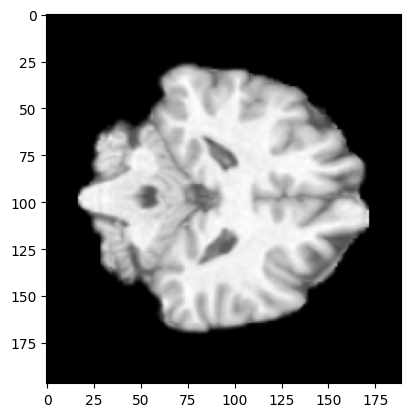

In [127]:
plt.imshow(recon_orig_shape[:, 90, :], cmap='gray')

In [130]:
recon_orig_shape.mean()

39.37718

In [113]:
orig_mri = super(type(healthy_dataset), healthy_dataset).__getitem__(sample_idx)['mri']

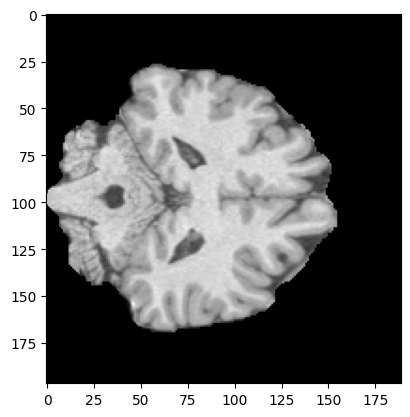

In [128]:
plt.imshow(orig_mri[:, 90, :], cmap='gray')

### Patches

In [114]:
%autoreload 2
from dataset import NiftiImageGenerator, NiftiPairImageGenerator, TrainFCDDataset, HealthyFCDDataset, TrainFCDPatchesDataset
from torchvision.transforms import RandomCrop, Compose, ToPILImage, Resize, ToTensor, Lambda
import torch
import sklearn

In [7]:
input_size=40
depth_size=40

transform = Compose([
    Lambda(lambda t: torch.tensor(t).float()),
    Lambda(lambda t: (t * 2) - 1),
    Lambda(lambda t: t.unsqueeze(0)),
    Lambda(lambda t: t.transpose(3, 1)),
])

input_transform = Compose([
    Lambda(lambda t: torch.tensor(t).float()),
    Lambda(lambda t: (t * 2) - 1),
    Lambda(lambda t: t.permute(3, 0, 1, 2)),
    Lambda(lambda t: t.transpose(3, 1)),
])

In [115]:
orig_patches_dataset = TrainPatchesDataset('../../data/train_patches_v3', splits_filename='stratified_8_cv_sample.npy', split_id=0)

train_patches_dataset = TrainFCDPatchesDataset('../../data/train_patches_v3', input_size, depth_size, 
                                               mask_transform=input_transform, target_transform=transform, 
                                               splits_filename='stratified_8_cv_sample.npy', split_id=0)

In [116]:
len(orig_patches_dataset), len(train_patches_dataset)

(1, 1)

In [118]:
sample, mask = orig_patches_dataset[0]['patch'], orig_patches_dataset[0]['mask']

In [119]:
ImageSliceViewer3D(sample, mask > 0, cmap='gray', mask_intensity=0.2)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [25]:
len(train_patches_dataset)

143

In [120]:
results_dir = "../scripts/results/train_fcd_inpainting_data_l1_masked_patches_sample_500_000"
samples = sorted([file for file in os.listdir(results_dir) if '.nii.gz' in file], key=lambda file: int(file.split('-')[1].split('.')[0]))
samples

['sample-1.nii.gz',
 'sample-2.nii.gz',
 'sample-3.nii.gz',
 'sample-4.nii.gz',
 'sample-5.nii.gz']

In [121]:
gen = nib.load(os.path.join(results_dir, samples[-1])).get_fdata()

In [122]:
mask, target = train_patches_dataset[0]['input'][1], train_patches_dataset[0]['target']

In [89]:
(mask > 0).sum()

tensor(915)

In [86]:
(target.squeeze()[mask > 0] - gen[mask > 0]).abs().mean()

tensor(0.5071, dtype=torch.float64)

In [741]:
mean_diff_norm = []
for i in range(100):
    sample = train_patches_dataset[i]
    input = sample['input']
    target = sample['target']
    
    gen = diffusion.sample(batch_size=1, condition_tensors=input.unsqueeze(0).cuda('cuda:1'))
    mask = (input[1] > 0).float()
    gen_patch = target.squeeze().clone()
    gen_patch[mask > 0] = gen.cpu().squeeze()[mask > 0].flatten()

    mean_diff_norm.append(gen_patch[mask > 0].mean() - target.squeeze().cpu()[mask > 0].mean())

sampling loop time step: 100%|██████████| 250/250 [00:09<00:00, 25.13it/s]


In [746]:
mean_diff_norm[45]

tensor(0.3893)

In [732]:
mask = (input[1] > 0).float()

In [733]:
gen_patch = target.squeeze().clone()
gen_patch[mask > 0] = gen.cpu().squeeze()[mask > 0].flatten()

In [736]:
ImageSliceViewer3D(target.squeeze().numpy(), mask.numpy(), cmap='gray', mask_intensity=0.2)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [735]:
ImageSliceViewer3D(gen_patch.numpy(), mask.numpy(), cmap='gray', mask_intensity=0.)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [195]:
from scipy.ndimage import gaussian_filter

def reconstruct_patch(orig_patch, gen_patch, fcd_mask):
    gen_patch = torch.from_numpy(gen_patch).transpose(0, 2).squeeze()
    gen_patch = ((gen_patch + 1) / 2).numpy()  #[-1, 1] -> [0, 1]

    orig_patch_clipped = np.clip(orig_patch, np.quantile(orig_patch, 0.001), np.quantile(orig_patch, 0.999))
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(orig_patch_clipped.reshape(-1, orig_patch_clipped.shape[-1]))
    gen_patch = scaler.inverse_transform(gen_patch.reshape(-1, gen_patch.shape[-1])).reshape(gen_patch.shape) # MinMax scaler inversed
    
    recon_patch = orig_patch.copy()
    recon_patch[fcd_mask > 0.5] = gen_patch[fcd_mask > 0.5].flatten()
    recon_patch_smoothed = gaussian_filter(recon_patch, sigma=0.5)
    recon_patch[fcd_mask > 0.5] = recon_patch_smoothed[fcd_mask > 0.5].flatten()

    return recon_patch

In [10]:
def inpaint_train_patch(medddpm_dataset, orig_dataset, model, sample_id):
    sample = medddpm_dataset[sample_id]
    orig_patch, orig_fcd_mask = orig_dataset[sample_id]['patch'], orig_patches_dataset[sample_id]['mask']
    gen_patch = model.sample(batch_size=1, condition_tensors=sample['input'].unsqueeze(0).cuda('cuda:1'))
    gen_patch = gen_patch.cpu().numpy().squeeze()
    recon_patch = reconstruct_patch(orig_patch, gen_patch, orig_fcd_mask)

    return recon_patch, orig_patch, orig_fcd_mask

In [27]:
orig_patches = []
recon_patches = []
fcd_masks = []

for sample_id in range(60):
    recon_patch, orig_patch, fcd_mask = inpaint_train_patch(train_patches_dataset, orig_patches_dataset, diffusion, sample_id)
    orig_patches.append(orig_patch)
    recon_patches.append(recon_patch)
    fcd_masks.append(fcd_mask)

sampling loop time step: 100%|██████████| 250/250 [00:09<00:00, 27.36it/s]


In [28]:
mean_diffs = []
for orig_patch, recon_patch, fcd_mask in zip(orig_patches, recon_patches, fcd_masks):
    mean_diffs.append(recon_patch[fcd_mask > 0.5].mean() - orig_patch[fcd_mask > 0.5].mean())

In [29]:
gen_fcd_means = [recon_patch[fcd_mask > 0.5].mean() for recon_patch in recon_patches]

(array([ 1.,  2.,  2.,  8., 18.,  9., 11.,  3.,  2.,  4.]),
 array([173.68684139, 197.83852658, 221.99021178, 246.14189697,
        270.29358217, 294.44526737, 318.59695256, 342.74863776,
        366.90032296, 391.05200815, 415.20369335]),
 <BarContainer object of 10 artists>)

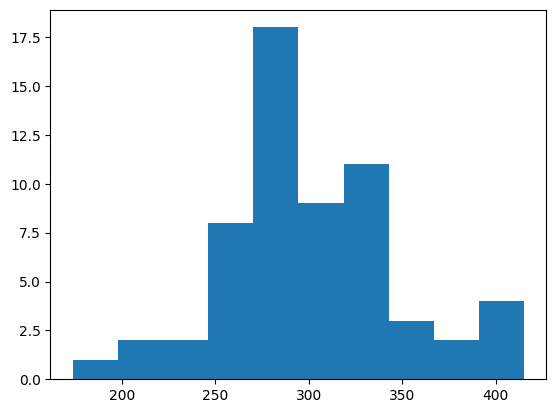

In [30]:
plt.hist(gen_fcd_means) # filtered dataset

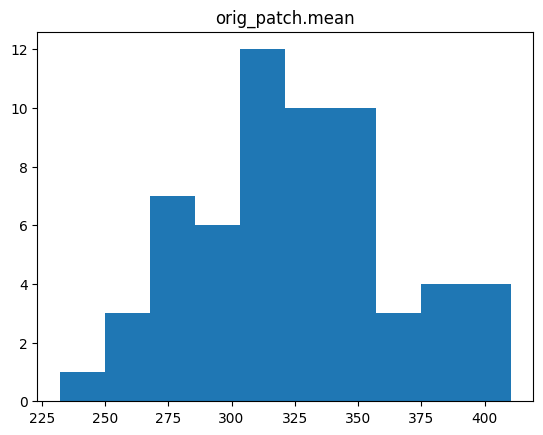

In [33]:
plt.hist([orig[fcd_mask > 0.5].mean() for (orig, fcd_mask) in zip(orig_patches, fcd_masks)])
plt.title('orig_patch.mean')
plt.show()

(array([ 1.,  0.,  0.,  0.,  2.,  9., 19., 16.,  7.,  6.]),
 array([ 70.09740586, 100.22050433, 130.3436028 , 160.46670126,
        190.58979973, 220.71289819, 250.83599666, 280.95909513,
        311.08219359, 341.20529206, 371.32839053]),
 <BarContainer object of 10 artists>)

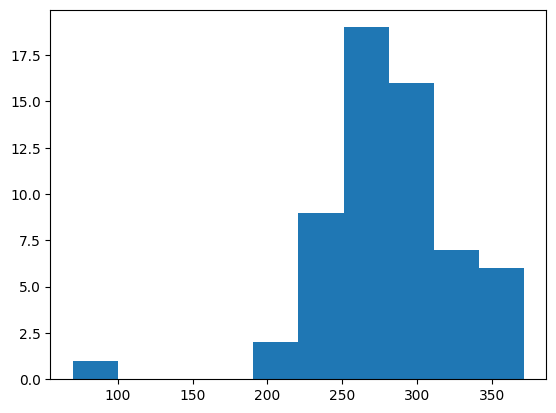

In [750]:
plt.hist(gen_fcd_means) #not filtered dataset

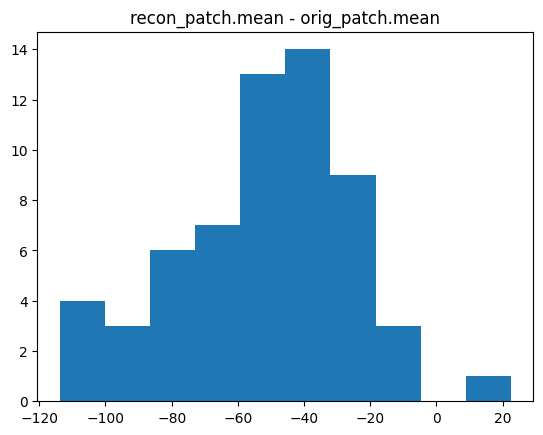

In [34]:
plt.hist(mean_diffs)
plt.title('recon_patch.mean - orig_patch.mean') #filtered dataset
plt.show()

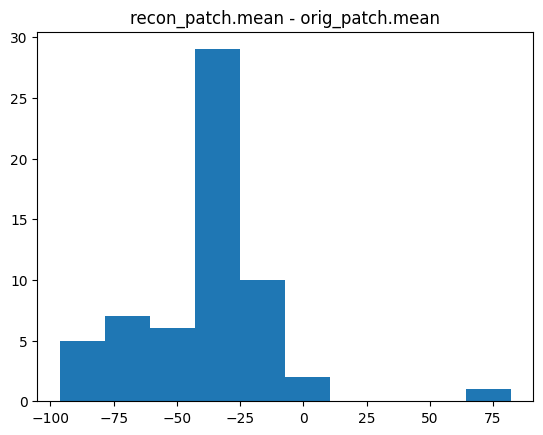

In [668]:
plt.hist(mean_diffs)
plt.title('recon_patch.mean - orig_patch.mean') #not filtered dataset
plt.show()

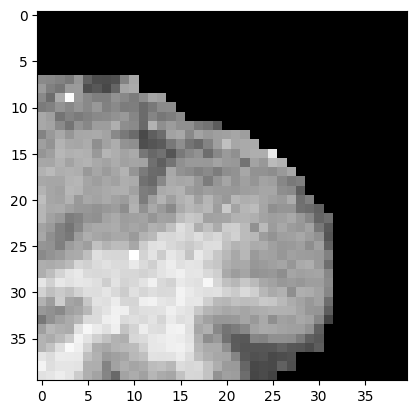

In [689]:
plt.imshow(recon_patches[21][:, :, 19], cmap='gray')

In [757]:
recon_patch_21 = inpaint_train_patch(train_patches_dataset, orig_patches_dataset, diffusion, 21)

sampling loop time step: 100%|██████████| 250/250 [00:08<00:00, 31.16it/s]


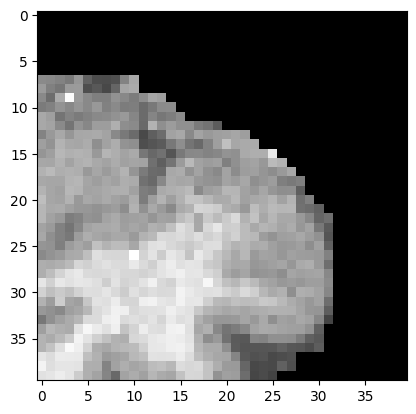

In [759]:
plt.imshow(recon_patch_21[0][:, :, 19], cmap='gray')

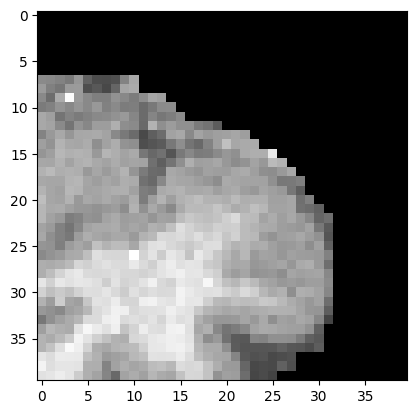

In [761]:
plt.imshow(recon_patch_21[1][:, :, 19], cmap='gray')

In [95]:
ea = event_accumulator.EventAccumulator('../scripts/logs/24-11-23T143414/events.out.tfevents.1732372454.fa35fcf6d84e.187225.0')
ea.Reload()

loss = np.array([step.value for step in ea.Scalars('training_loss')])
len(loss)

10000

In [154]:
healthy_dataset = HealthyFCDDataset('/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_mri_t1',
                                    '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/3dunet_masks_right_size/masks/split0/masks',
                                    '/workspace/MRI-inpainting-project/data/healthy_mri_C_00/healthy_masks_t1/3dunet_masks_right_size/patch_masks/split0',
                                    input_size=input_size,
                                    depth_size=depth_size,
                                    mask_transform=input_transform,
                                    mri_transform=transform)

In [165]:
from diffusion_model.unet import create_model
from diffusion_model.trainer import GaussianDiffusion

ckpt_path = '../scripts/results/train_fcd_inpainting_data_l1_masked_patches_filtered_2_500_000/model-5.pt'

channel_mult = "1,2,4,4"

with torch.cuda.device('cuda:2'):
    model = create_model(input_size, num_channels=64, num_res_blocks=1, in_channels=3, out_channels=1, channel_mult=channel_mult).cuda()
    
    diffusion = GaussianDiffusion(
        model,
        image_size = input_size,
        depth_size = depth_size,
        timesteps = 250,   # number of steps
        loss_type = 'l1_masked', 
        with_condition=True,
    ).cuda()
    
    diffusion.load_state_dict(torch.load(ckpt_path, map_location='cuda:2')['ema'])
    print("Model Loaded!")

Model Loaded!


In [166]:
def inpaint_healthy_mri(medddpm_healthy_dataset, model, sample_id):
    sample = medddpm_healthy_dataset[sample_id][0]
    filename = medddpm_healthy_dataset[sample_id][1]
    orig_sample = super(type(medddpm_healthy_dataset), medddpm_healthy_dataset).getbyname(filename)
    orig_patch = orig_sample['mri'][orig_sample['patch_mask'] > 0].reshape(40, 40, 40)
    orig_fcd_mask = orig_sample['mask'][orig_sample['patch_mask'] > 0].reshape(40, 40, 40)
    
    gen_patch = model.sample(batch_size=1, condition_tensors=sample.to('cuda:2'))
    gen_patch = gen_patch.cpu().numpy().squeeze()
    recon_patch = reconstruct_patch(orig_patch, gen_patch, orig_fcd_mask)

    recon_mri = orig_sample['mri'].copy()
    recon_mri[orig_sample['patch_mask'] > 0] = recon_patch.flatten()

    return recon_mri, orig_sample['mask']

In [196]:
sample_id = 5
recon_mri, recon_patch, orig_patch, orig_fcd_mask = inpaint_healthy_mri(healthy_dataset, diffusion, sample_id)

filename = healthy_dataset[sample_id][1]
orig_sample = super(type(healthy_dataset), healthy_dataset).getbyname(filename)
orig_mask = orig_sample['mask']

sampling loop time step: 100%|██████████| 250/250 [00:55<00:00,  4.54it/s]


In [187]:
filename = healthy_dataset[4][1]
orig_sample = super(type(healthy_dataset), healthy_dataset).getbyname(filename)

In [193]:
filename

'sub-00012_t1_brain-final.nii.gz'

In [188]:
orig_mask = orig_sample['mask']

In [665]:
orig_patches_healthy = []
recon_patches_healthy = []
fcd_masks_healthy = []

for sample_id in range(60):
    _, recon_patch, orig_patch, fcd_mask = inpaint_healthy_mri(healthy_dataset, diffusion, sample_id)
    orig_patches_healthy.append(orig_patch)
    recon_patches_healthy.append(recon_patch)
    fcd_masks_healthy.append(fcd_mask)

sampling loop time step: 100%|██████████| 250/250 [00:09<00:00, 25.22it/s]


In [666]:
mean_diffs_healthy = []
for orig_patch, recon_patch, fcd_mask in zip(orig_patches_healthy, recon_patches_healthy, fcd_masks_healthy):
    mean_diffs_healthy.append(recon_patch[fcd_mask > 0.5].mean() - orig_patch[fcd_mask > 0.5].mean())

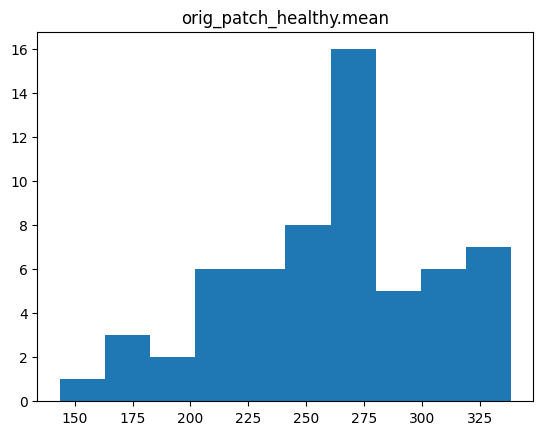

In [673]:
plt.hist([healthy[fcd_mask > 0.5].mean() for healthy, fcd_mask in zip(orig_patches_healthy, fcd_masks_healthy)])
plt.title('orig_patch_healthy.mean')
plt.show()

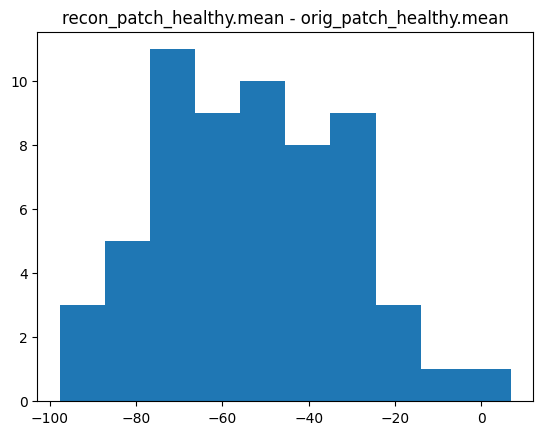

In [669]:
plt.hist(mean_diffs_healthy)
plt.title('recon_patch_healthy.mean - orig_patch_healthy.mean')
plt.show()

In [197]:
ImageSliceViewer3D(recon_mri, orig_mask, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [198]:
recon_mri_nib = nib.Nifti1Image(recon_mri, affine=np.eye(4))

In [199]:
nib.save(recon_mri_nib, "../gen_samples/sub-00012_t1_brain-final-smoothing.nii.gz")

In [676]:
ImageSliceViewer3D(orig_patch, orig_fcd_mask, cmap='gray', mask_intensity=0.)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [675]:
ImageSliceViewer3D(recon_patch, orig_fcd_mask, cmap='gray', mask_intensity=0.)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

## Train on sample patch

In [125]:
from diffusion_model.unet import create_model
from diffusion_model.trainer import GaussianDiffusion

ckpt_path = '../scripts/results/train_fcd_inpainting_data_l1_masked_patches_sample_500_000/model-5.pt'

channel_mult = "1,2,4,4"

with torch.cuda.device('cuda:1'):
    model = create_model(input_size, num_channels=64, num_res_blocks=1, in_channels=3, out_channels=1, channel_mult=channel_mult).cuda()
    
    diffusion = GaussianDiffusion(
        model,
        image_size = input_size,
        depth_size = depth_size,
        timesteps = 250,   # number of steps
        loss_type = 'l1_masked', 
        with_condition=True,
    ).cuda()
    
    diffusion.load_state_dict(torch.load(ckpt_path, map_location='cuda:1')['ema'])
    print("Model Loaded!")

Model Loaded!


In [126]:
orig_patches_dataset = TrainPatchesDataset('../../data/train_patches_v3', splits_filename='stratified_8_cv_sample.npy', split_id=0)

train_patches_dataset = TrainFCDPatchesDataset('../../data/train_patches_v3', input_size, depth_size, 
                                               mask_transform=input_transform, target_transform=transform, 
                                               splits_filename='stratified_8_cv_sample.npy', split_id=0)

In [128]:
recon_patch, orig_patch, fcd_mask = inpaint_train_patch(train_patches_dataset, orig_patches_dataset, diffusion, 0)

sampling loop time step: 100%|██████████| 250/250 [00:08<00:00, 30.61it/s]


In [136]:
ImageSliceViewer3D(orig_patch, fcd_mask, cmap='gray', mask_intensity=0.)

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [130]:
ImageSliceViewer3D(recon_patch, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [137]:
ea = event_accumulator.EventAccumulator('../scripts/results/train_fcd_inpainting_data_l1_masked_patches_sample_500_000/24-12-09T135132/events.out.tfevents.1733752292.c8045da5694c.266956.0')
ea.Reload()

loss = np.array([step.value for step in ea.Scalars('training_loss')])
len(loss)

10000

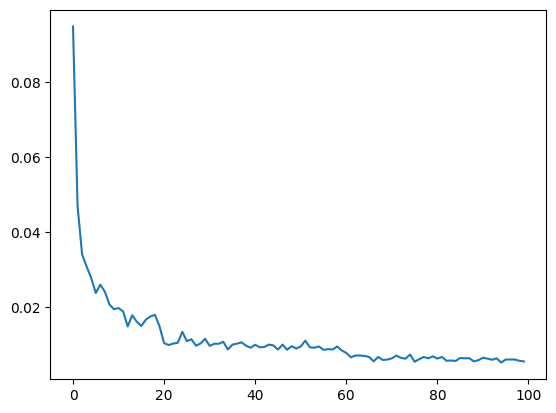

In [139]:
plt.plot(loss.reshape(-1, 100).mean(axis=1))

In [143]:
input, target = train_patches_dataset[0]['input'], train_patches_dataset[0]['target']

In [144]:
input.shape, target.shape

(torch.Size([2, 40, 40, 40]), torch.Size([1, 40, 40, 40]))

In [147]:
ImageSliceViewer3D(input[0].numpy(), cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [148]:
ImageSliceViewer3D(input[1].numpy(), cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [149]:
ImageSliceViewer3D(target[0].numpy(), cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

In [150]:
runtime_sample = nib.load('../scripts/results/train_fcd_inpainting_data_l1_masked_patches_sample_500_000/sample-5.nii.gz').get_fdata()

In [153]:
ImageSliceViewer3D(runtime_sample, cmap='gray')

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…